In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt


# Load the Dataset

In [2]:
df = pd.read_csv('Salary_dataset.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.2,39344
1,1.4,46206
2,1.6,37732
3,2.1,43526
4,2.3,39892


In [6]:
X = df['YearsExperience'].values

In [5]:
y = df['Salary'].values

# Preprocess the Data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(21,)
(21,)
(9,)
(9,)


In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [19]:
"""ValueError: Expected 2D array, got 1D array instead:
array=[ 1.2  2.3  5.2  3.   4.2  4.1  8.   1.4  1.6  9.1  2.1  7.2  9.6  6. 10.6  6.9  3.3  4.   4.6  6.1  3.1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample."""

X_train = X_train.reshape(-1,1) #error sorted
 
scaler.fit(X_train)

MinMaxScaler()

In [21]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Build the Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [98]:
model = Sequential()

model.add(Dense(units = 200, activation = 'leaky_relu'))
model.add(Dense(units = 500, activation = 'leaky_relu'))
model.add(Dense(units = 1000, activation = 'leaky_relu'))
model.add(Dense(units = 500, activation = 'leaky_relu'))
model.add(Dense(units = 200, activation = 'leaky_relu'))

model.add(Dense(units = 1)) #regresion output

model.compile(optimizer='rmsprop', loss='mse')

In [99]:
model.fit(x=X_train, y = y_train, epochs= 100, verbose = 1)

Epoch 1/100
1/1 [==============================] - 1s 596ms/step - loss: 5729054720.0000
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 5728972800.0000
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 5728389632.0000
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 5726060032.0000
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 5719115776.0000
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 5702769664.0000
Epoch 7/100
1/1 [==============================] - 0s 689us/step - loss: 5670378496.0000
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 5613670912.0000
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 5523209216.0000
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 5388958720.0000
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - loss: 5201017344.0000
Epoch 12/100
1/1 [=============

In [100]:
loss_df = pd.DataFrame(model.history.history)

In [101]:
loss_df

,loss
0,5.729055e+09
1,5.728973e+09
2,5.728390e+09
3,5.726060e+09
4,5.719116e+09
...,...
95,4.526379e+07
96,4.735488e+07
97,5.417574e+07
98,4.896298e+07


<Axes: >

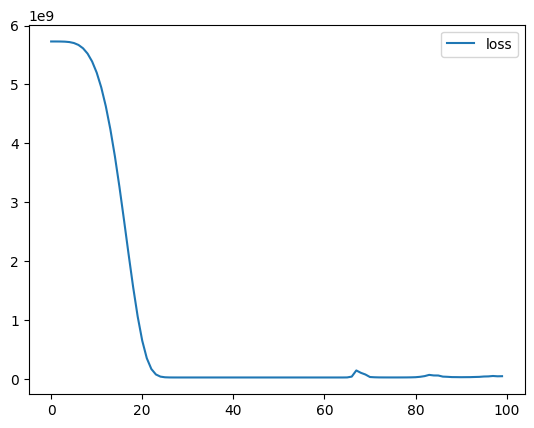

In [102]:
loss_df.plot()

In [103]:
model.evaluate(X_test, y_test, verbose=0)

349434839040.0

# Predict new values

In [105]:
test_predictions = model.predict(X_test)

1/1 [==============================] - 0s 124ms/step


In [106]:
test_predictions

array([[929559.3 ],
       [497633.78],
       [800900.56],
       [534393.4 ],
       [341405.38],
       [387354.9 ],
       [993888.6 ],
       [846850.06],
       [414924.6 ]], dtype=float32)

In [108]:
test_predictions = pd.Series(test_predictions.reshape(9,))


In [109]:
pred_df = pd.DataFrame(y_test, columns=['True Y'])

In [110]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [111]:
pred_df.columns = ['True Y', 'Model Predictions']

In [114]:
import seaborn as sns

<Axes: xlabel='True Y', ylabel='Model Predictions'>

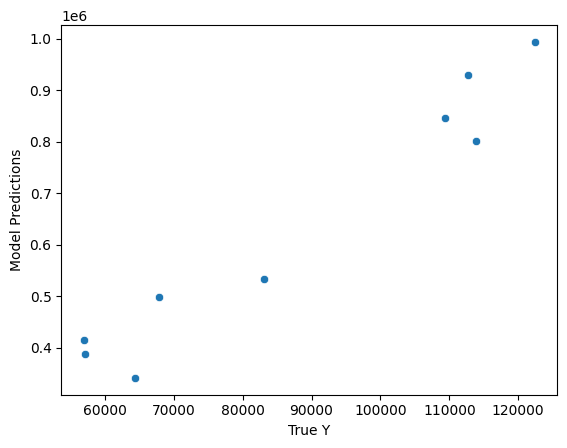

In [115]:
sns.scatterplot(
    x = 'True Y',
    y = 'Model Predictions',
    data = pred_df
)

# evaluating

In [116]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [117]:
mean_squared_error(pred_df['True Y'],
                   pred_df['Model Predictions'])

349434830024.8749

In [118]:
mean_absolute_error(pred_df['True Y'],
                   pred_df['Model Predictions'])

551001.7326388889

In [119]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


# Predicting from the trained model

In [120]:
new_person = [10]

In [126]:
new_person = np.array(new_person)
new_person = new_person.reshape(-1,1)
new_person = scaler.transform(new_person)

In [127]:
model.predict(new_person)

ValueError: in user code:

    File "c:\Users\lasit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\lasit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\lasit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\lasit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2283, in predict_step
        return self(x, training=False)
    File "c:\Users\lasit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer 'sequential_22' (type Sequential).
    
    Cannot iterate over a shape with unknown rank.
    
    Call arguments received by layer 'sequential_22' (type Sequential):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • training=False
      • mask=None


# saving 

In [129]:
from tensorflow.keras.models import load_model
model.save('my_new_example.h5')

c:\Users\lasit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Loading

In [ ]:
later_model - load_model('my_new_example.h5')
later_model.predict(new_person)